In [1]:
from metal.nn import NeuralNetwork
from metal.utils import train_test_split, to_categorical, normalize
from metal.utils import get_random_subsets, shuffle_data, Plot
from metal.utils.data_operation import accuracy_score
from metal.optimizers import StochasticGradientDescent,Adam
from metal.loss_functions import CrossEntropy
from metal.utils.misc import bar_widgets
from metal.layers.dense import Dense
from metal.layers.conv2D import Conv2D
from metal.layers.flatten import Flatten
from metal.layers.layer import Activation
from autograd.tensor import Tensor
from autograd.parameter import Parameter
from metal.models.convnet import ConvNet
import h5py
from metal.layers.batchnormalization_ import BatchNormalization
from metal.utils.production_util import save_model

resource limit  (8388608, 8388608)
recursion limit  3000


In [2]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
import numpy as np
import time

In [3]:
optimizer = Adam()
data = datasets.load_digits()
X = data.data
y = data.target
loss = CrossEntropy
# Covnet to  one-hot encoding 
y = to_categorical(y.astype("int"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, seed = 1)

X_train = X_train.reshape((-1,1,8,8))
X_test = X_test.reshape((-1,1,8,8))

X_train = Parameter(X_train, requires_grad=False)
X_test = Parameter(X_test, requires_grad=False)
y_train = Parameter(y_train, requires_grad=False)
y_test = Parameter(y_test, requires_grad=False)


In [4]:
covnet = ConvNet(optimizer=optimizer, loss=loss,  validation_data=(X_test,y_test))

In [5]:
covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, input_shape=(1,8,8), padding='same', seed=1))
covnet.add(Activation('relu'))
covnet.add(BatchNormalization())

covnet.add(Conv2D(n_filters=16, filter_shape=(3,3), stride=1, padding='same', seed=2))
covnet.add(Flatten())
covnet.add(BatchNormalization())
covnet.add(Dense(256, seed=4))
covnet.add(Activation('relu'))
covnet.add(Dense(10,seed=3))
covnet.add(Activation('softmax'))

In [6]:
s = time.time()
train_err, val_err = covnet.fit(X_train, y_train, n_epochs=10, batch_size=64)
e = time.time()
print(e-s)

9.149244546890259


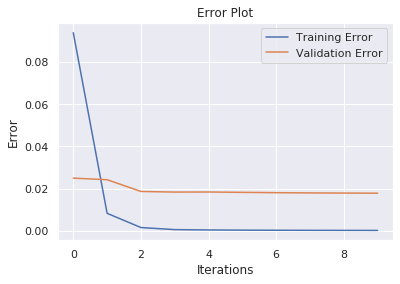

Accuracy: 0.9818941504178273


In [7]:
covnet.eval(X_test, y_test)

In [20]:
w = covnet.layers[3].W_col

In [21]:
w.shape

(16, 144)

In [22]:
np.sqrt(16*144)

48.0

In [23]:
wr = w.reshape(48,48)

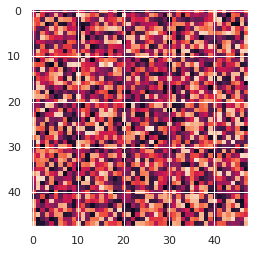

In [24]:
plt.imshow(wr)  # graph it
plt.show() 

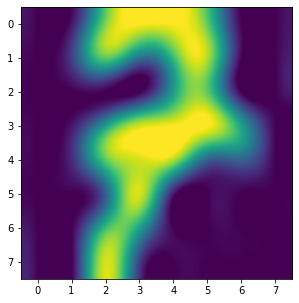

In [8]:
data_ = X_test[3].reshape(1,1,8,8)
plt.figure(figsize=(5,5))
plt.imshow(data_.data.reshape(data_.shape[-1],data_.shape[-2]), interpolation='lanczos')
plt.show()

In [9]:
covnet.predict(data_)

7

In [27]:
for u in range(len(covnet.layers)):
    print('layer',u)
    for i, c in enumerate(covnet.layers[u].parameters()):
        #covnet.layers[u].update_pass()
        for i in gc.get_referents(c):
            print(i)

layer 0
[[ 7.00058183e-03]
 [ 2.88541391e-02]
 [-2.14161295e-02]
 [ 1.59398114e-04]
 [-1.30510874e-04]
 [-1.44602684e-03]
 [-1.72189381e-02]
 [-1.38721205e-02]
 [-6.27797999e-05]
 [-1.56929214e-02]
 [-9.21203103e-03]
 [ 1.16177248e-02]
 [ 1.67666189e-02]
 [-1.17010148e-02]
 [-7.35229533e-03]
 [-5.64343389e-03]]
[]
Parameter([[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], requires_grad=False)
15893
None
True
(16, 1)
{'type': <class 'autograd.parameter.Parameter'>}
<class 'autograd.parameter.Parameter'>
[[[[-0.06043923  0.14346758 -0.34208718]
   [-0.1439775  -0.23683986 -0.26592997]
   [-0.1994823  -0.10469672 -0.06641474]]]


 [[[ 0.03330651 -0.04206475  0.12299652]
   [-0.20164908  0.2332666  -0.31430605]
   [ 0.1350926  -0.06994998  0.03434798]]]


 [[[-0.25111535 -0.21134026  0.17160442]
   [ 0.3058077  -0.13451661  0.10608357]
   [ 0.242271    0.23714122 -0.31277153]]]


 [[[-0.28408027 -0.2169814   0.25558648]
   [-0.26552325 -0.05

In [8]:
import gc
gc.get_threshold()

(700, 10, 10)

In [9]:
import gc
gc.get_count()

(108, 9, 0)

In [25]:
import inspect
for name, value in inspect.getmembers(covnet.layers[0]):
    if isinstance(value, Parameter):
        print(value.depends_on)

[]
[]


In [ ]:
for r in gc.get_referents(three):
    pprint.pprint(r)

In [5]:
class my_list(list):
   pass

new_list = my_list('String') #Use my_list class to define a list

print(new_list)
weak_ref = weakref.ref(new_list)

['S', 't', 'r', 'i', 'n', 'g']


In [7]:
weak_ref()

['S', 't', 'r', 'i', 'n', 'g']

In [8]:
weak_ref()

['S', 't', 'r', 'i', 'n', 'g']

In [9]:
str(weakref.getweakrefcount(covnet.layers[0].w))

NameError: name 'covnet' is not defined

In [10]:
def my_c(y):
    class My_c():
        def __init__(self,o):
            self.o = o
    x = My_c(y)
    return weakref.ref(x)


In [11]:
x = my_c(6)

In [6]:
from autograd.dependency import Dependency
from memory_profiler import profile


In [90]:
class A(object):
    def __init__(self, name, parent=None):
        self.name = name
        self._parent = weakref.ref(parent) if parent else parent
        self.children = set()
        self.workload = ' ' * 128 * 1024 * 1024
    @property
    def parent(self):
        if not self._parent:
            return self._parent
        _parent = self._parent()
        if _parent:
            return _parent
        else:
            raise LookupError("Parent was destroyed")
    def __del__(self):
        print("delete", self.name)

In [91]:
def main():
    for _ in range(10):
        a = A(name=1)
        a.children.add(A(name=2, parent=a))
    print("end")
if __name__ == "__main__":
    main()

delete 1
delete 2
delete 1
delete 2
delete 1
delete 2
delete 1
delete 2
delete 1
delete 2
delete 1
delete 2
delete 1
delete 2
delete 1
delete 2
delete 1
delete 2
end
delete 1
delete 2


In [92]:
2569.4  + 2441.4  + 2569.6

7580.4

In [93]:
a = A(name=1)
a.children.add(A(name=2, parent=Dependency(a,_)))

In [94]:
for i in a.children:
    print(i.parent)

LookupError: Parent was destroyed

In [24]:
import weakref

class weaklist(list):
    __slots__ = '__weakref__',

l = weaklist()
r = weakref.ref(l)

In [26]:
l

[]

In [17]:
import weakref


class Facade:
    def __init__(self, subsystem):
        self.subsystem = subsystem
        
        subsystem.Register(self,self.grad_fn)
        self.workload = ' ' * 128 * 1024 * 1024
        self.id =id(self)
        
    def grad_fn(self,h):
        return self.id+h


class Subsystem:
    def __init__(self, name):
        self.notify = []
        self.name = name 
    def Register(self, who, g):
        self.notify.append((weakref.proxy(who), weakref.WeakMethod(g)))
    @property
    def parent(self):
        if not self.notify:
            return self.notify
        _parent = self.parent()
        if notify:
            return notify
        else:
            raise LookupError("Parent was destroyed")
    def __del__(self):
        print("delete", self)

    

        

In [19]:
def main():
    for _ in range(10):
        a = Facade(Subsystem(name=1))
        print(a.subsystem.notify[0])
        
    print("end")
if __name__ == "__main__":
    main()

(<weakproxy at 0x7ffe216cb908 to Facade at 0x7ffe846fec18>, <weakref at 0x7ffe216f27b8; to 'Facade' at 0x7ffe846fec18>)
delete <__main__.Subsystem object at 0x7ffe846fea20>
(<weakproxy at 0x7ffe216cb958 to Facade at 0x7ffe47d12828>, <weakref at 0x7ffe216f2748; to 'Facade' at 0x7ffe47d12828>)
delete <__main__.Subsystem object at 0x7ffe216c4c18>
(<weakproxy at 0x7ffe216beef8 to Facade at 0x7ffe47d127f0>, <weakref at 0x7ffe216f27b8; to 'Facade' at 0x7ffe47d127f0>)
delete <__main__.Subsystem object at 0x7ffe846fec18>
(<weakproxy at 0x7ffe216cb958 to Facade at 0x7ffe47d12a20>, <weakref at 0x7ffe216f2748; to 'Facade' at 0x7ffe47d12a20>)
delete <__main__.Subsystem object at 0x7ffe216c4c18>
(<weakproxy at 0x7ffe21be2bd8 to Facade at 0x7ffe47d127f0>, <weakref at 0x7ffe216f27b8; to 'Facade' at 0x7ffe47d127f0>)
delete <__main__.Subsystem object at 0x7ffe846fec18>
(<weakproxy at 0x7ffe216cb958 to Facade at 0x7ffe47d12a20>, <weakref at 0x7ffe216f2748; to 'Facade' at 0x7ffe47d12a20>)
delete <__main_

In [23]:
a = Facade(Subsystem(name=1))
print(a.subsystem.notify[0][1])

delete <__main__.Subsystem object at 0x7ffe216c4e10>
<weakref at 0x7ffe216f2a58; to 'Facade' at 0x7ffe216c4e80>


In [191]:
1+1

2

In [193]:
print(a.subsystem.notify[0][1]()(2))

139835325635890


In [54]:
p1 = Parameter(np.random.rand(5,4))

In [55]:
p2 = Parameter(np.random.rand(5,4))

In [5]:
#p6 = p1*p2

In [6]:
from metal.layers.activation_functions import ReLU

In [7]:
s1=ReLU()

In [8]:
p7=s1(p1)

In [8]:
#s = p7.sum()

In [9]:
d = Dense(n_units=5,input_shape=(4,))

In [10]:
d.initialize()

In [11]:
dp = d.forward_pass(p7)

In [9]:
s = p7.sum()

In [10]:
s.backward()

<weakref at 0x7f595e2c5588; dead>


TypeError: 'NoneType' object is not callable

In [69]:
z = type(p7)

In [73]:
id(p7)

140262926787192

In [74]:
s = z(np.random.randn(5,4))

In [75]:
id(s)

140262926788984

In [17]:
p7.depends_on[0].grad_fn()(1)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

In [56]:
from autograd.dependency import Dependency
from memory_profiler import profile
import weakref
from copy import copy
import sys

class _Add(object):
    __slots__ = ('__weakref__','type','t1','t2','name')

    def __init__(self, t1, t2, name_child=None):
        self.type = type(t1)
        self.t1 = t1
        self.t2 = t2
        self.name = name_child

    def _add(self):
        data = self.t1.data + self.t2.data
        requires_grad = self.t1.requires_grad or self.t2.requires_grad
        depends_on: List[Dependency] = []

        if self.t1.requires_grad:
            depends_on.append(Dependency(self.t1, self.grad_add1))
            
        if self.t2.requires_grad:
            depends_on.append(Dependency(self.t2, self.grad_add2))
        print(sys.getrefcount(self.t1) )  
        return self.type(data, requires_grad, depends_on, name=self.name)
    
    def grad_add1(self, grad: np.ndarray) -> np.ndarray:
        # Sum out added dims
        ndims_added = grad.ndim - self.t1.data.ndim
        for _ in range(ndims_added):
            grad = grad.sum(axis=0)
        # Sum across broadcasted (but non-added dims)
        for i, dim in enumerate(self.t1.shape):
            if dim == 1:
                grad = grad.sum(axis=i, keepdims=True)
        return grad

    def grad_add2(self, grad: np.ndarray) -> np.ndarray:
        # Sum out added dims
        ndims_added = grad.ndim - self.t2.data.ndim
        for _ in range(ndims_added):
            grad = grad.sum(axis=0)
        # Sum across broadcasted (but non-added dims)
        for i, dim in enumerate(self.t2.shape):
            if dim == 1:
                grad = grad.sum(axis=i, keepdims=True)
        return grad

In [57]:
for i in range( 10):
    x = _Add(p1,p2)._add()


3
4
4
4
4
4
4
4
4
4


In [64]:
x.depends_on[0].Node
sys.getrefcount(x)


5

In [50]:
from __future__ import print_function
from sklearn import datasets
import matplotlib.pyplot as plt
import math 
import numpy as np
import PIL
from PIL import Image
import urllib
from skimage.transform import resize